In [1]:
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.PETS)
path

Path('/home/koichiro_mori/.fastai/data/oxford-iiit-pet')

In [3]:
path.ls()

(#2) [Path('/home/koichiro_mori/.fastai/data/oxford-iiit-pet/annotations'),Path('/home/koichiro_mori/.fastai/data/oxford-iiit-pet/images')]

In [4]:
(path / 'images').ls()

(#7393) [Path('/home/koichiro_mori/.fastai/data/oxford-iiit-pet/images/german_shorthaired_108.jpg'),Path('/home/koichiro_mori/.fastai/data/oxford-iiit-pet/images/Bengal_38.jpg'),Path('/home/koichiro_mori/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_145.jpg'),Path('/home/koichiro_mori/.fastai/data/oxford-iiit-pet/images/samoyed_115.jpg'),Path('/home/koichiro_mori/.fastai/data/oxford-iiit-pet/images/american_bulldog_18.jpg'),Path('/home/koichiro_mori/.fastai/data/oxford-iiit-pet/images/pomeranian_17.jpg'),Path('/home/koichiro_mori/.fastai/data/oxford-iiit-pet/images/german_shorthaired_45.jpg'),Path('/home/koichiro_mori/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_37.jpg'),Path('/home/koichiro_mori/.fastai/data/oxford-iiit-pet/images/scottish_terrier_39.jpg'),Path('/home/koichiro_mori/.fastai/data/oxford-iiit-pet/images/scottish_terrier_81.jpg')...]

In [5]:
fname = (path / 'images').ls()[0]
fname

Path('/home/koichiro_mori/.fastai/data/oxford-iiit-pet/images/german_shorthaired_108.jpg')

In [6]:
fname.name

'german_shorthaired_108.jpg'

In [7]:
re.findall(r'(.+)_\d+.jpg$', fname.name)

['german_shorthaired']

In [8]:
pets = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(seed=42),
    get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224, min_scale=0.75))

In [9]:
dls = pets.dataloaders(path / 'images')
dls

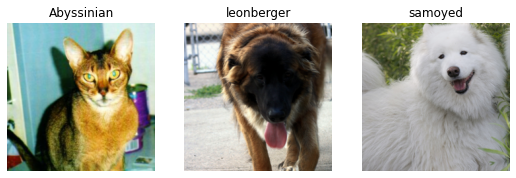

In [12]:
dls.show_batch(nrows=1, ncols=3)

In [13]:
pets.summary(path / 'images')

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /home/koichiro_mori/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_177.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=375x500
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /home/koichiro_mori/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_177.jpg
    applying partial gives
      yorkshire_terrier
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(36)

Final sample: (PILImage mode=RGB size=375x500, TensorCategory(36))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, '

In [16]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(2)

epoch,train_loss,valid_loss,accuracy,time
0,1.490475,0.331314,0.895129,00:26


epoch,train_loss,valid_loss,accuracy,time
0,0.537861,0.297184,0.913396,00:31
1,0.331768,0.234322,0.924222,00:31


In [18]:
pets = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(seed=42),
    get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
    item_tfms=Resize(224),
    batch_tfms=aug_transforms(size=224, min_scale=0.75)
)
dls = pets.dataloaders(path / 'images')
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(2)

epoch,train_loss,valid_loss,accuracy,time
0,1.420113,0.328705,0.899188,00:20


epoch,train_loss,valid_loss,accuracy,time
0,0.464575,0.281195,0.907307,00:26
1,0.254946,0.232199,0.926252,00:26


In [19]:
pets = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(seed=42),
    get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
    item_tfms=Resize(224))
dls = pets.dataloaders(path / 'images')
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(2)

epoch,train_loss,valid_loss,accuracy,time
0,1.417853,0.339583,0.895805,00:20


epoch,train_loss,valid_loss,accuracy,time
0,0.463881,0.289716,0.920162,00:25
1,0.259733,0.226339,0.935724,00:25


In [20]:
x, y = dls.one_batch()
x.shape, y.shape

(torch.Size([64, 3, 224, 224]), torch.Size([64]))

In [21]:
y

TensorCategory([36, 20,  3,  8, 14, 18, 29,  6,  3,  1,  3, 16, 30, 13, 34, 18,  4, 19,
        26,  9, 16, 16,  8, 20,  6,  6, 30, 16, 22, 11,  3, 12, 19, 19, 22, 11,
        27, 34, 21, 27, 26,  9, 30, 32, 25, 11, 36, 11, 22, 30,  6, 13, 29, 30,
         2, 35,  2, 34, 10, 20, 16, 28, 18, 27], device='cuda:0')

In [23]:
preds, _ = learn.get_preds(dl=[(x, y)])
preds.shape

torch.Size([64, 37])

In [25]:
preds[0].shape

torch.Size([37])

In [26]:
preds[0].sum()

tensor(1.0000)

In [36]:
from fastbook import *

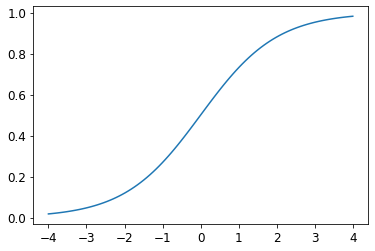

In [37]:
plot_function(torch.sigmoid, min=-4, max=4)

In [38]:
acts = torch.randn((6, 2)) * 2
acts

tensor([[ 0.6734,  0.2576],
        [ 0.4689,  0.4607],
        [-2.2457, -0.3727],
        [ 4.4164, -1.2760],
        [ 0.9233,  0.5347],
        [ 1.0698,  1.6187]])

In [39]:
acts.sigmoid()

tensor([[0.6623, 0.5641],
        [0.6151, 0.6132],
        [0.0957, 0.4079],
        [0.9881, 0.2182],
        [0.7157, 0.6306],
        [0.7446, 0.8346]])

In [40]:
(acts[:, 0] - acts[:, 1]).sigmoid()

tensor([0.6025, 0.5021, 0.1332, 0.9966, 0.5959, 0.3661])

In [41]:
(acts[:, 1] - acts[:, 0]).sigmoid()

tensor([0.3975, 0.4979, 0.8668, 0.0034, 0.4041, 0.6339])

In [42]:
def softmax(x):
    return exp(x) / exp(x).sum(dim=1, keepdim=True)

In [43]:
sm_acts = torch.softmax(acts, dim=1)
sm_acts

tensor([[0.6025, 0.3975],
        [0.5021, 0.4979],
        [0.1332, 0.8668],
        [0.9966, 0.0034],
        [0.5959, 0.4041],
        [0.3661, 0.6339]])

In [44]:
targ = tensor([0, 1, 0, 1, 1, 0])

In [45]:
sm_acts

tensor([[0.6025, 0.3975],
        [0.5021, 0.4979],
        [0.1332, 0.8668],
        [0.9966, 0.0034],
        [0.5959, 0.4041],
        [0.3661, 0.6339]])

In [46]:
idx = range(6)
idx

range(0, 6)

In [47]:
sm_acts[idx, targ]

tensor([0.6025, 0.4979, 0.1332, 0.0034, 0.4041, 0.3661])

In [48]:
-sm_acts[idx, targ]

tensor([-0.6025, -0.4979, -0.1332, -0.0034, -0.4041, -0.3661])

In [58]:
F.nll_loss(sm_acts, targ, reduction='none')

tensor([-0.6025, -0.4979, -0.1332, -0.0034, -0.4041, -0.3661])

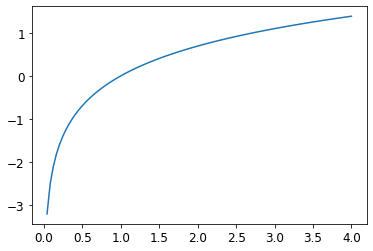

In [52]:
plot_function(torch.log, min=0, max=4)

In [53]:
loss_func = nn.CrossEntropyLoss()

In [54]:
loss_func(acts, targ)

tensor(1.8045)

In [55]:
F.cross_entropy(acts, targ)

tensor(1.8045)

In [56]:
nn.CrossEntropyLoss(reduction='none')(acts, targ)

tensor([0.5067, 0.6973, 2.0160, 5.6958, 0.9062, 1.0048])

In [59]:
F.nll_loss(sm_acts.log(), targ, reduction='none')

tensor([0.5067, 0.6973, 2.0160, 5.6958, 0.9062, 1.0048])

In [60]:
pets = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(seed=42),
    get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path / 'images')
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(2)

epoch,train_loss,valid_loss,accuracy,time
0,1.547652,0.345089,0.897158,00:32


epoch,train_loss,valid_loss,accuracy,time
0,0.490398,0.323593,0.907984,00:41
1,0.312809,0.219177,0.934371,00:41


In [63]:
interp = ClassificationInterpretation.from_learner(learn)
interp

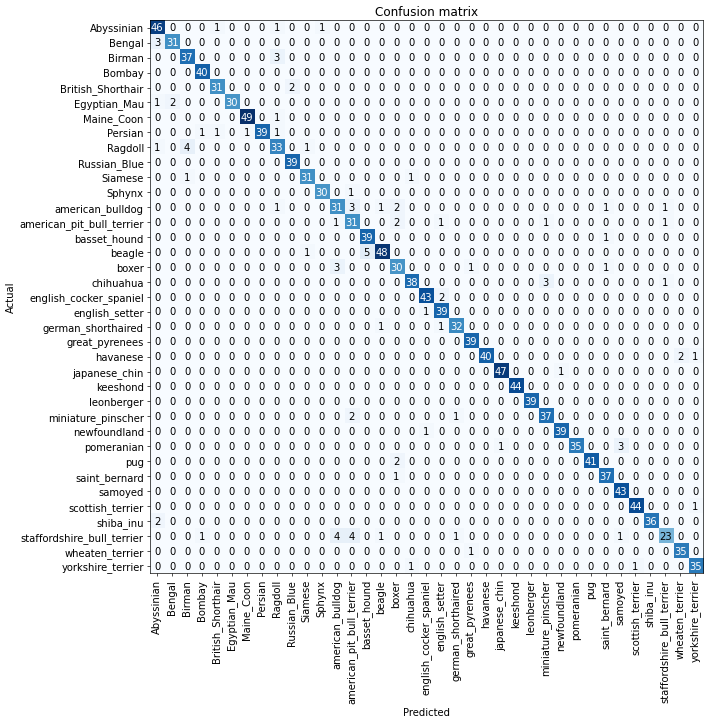

In [64]:
interp.plot_confusion_matrix(figsize=(12, 12), dpi=60)

In [65]:
interp.most_confused(min_val=5)

[('beagle', 'basset_hound', 5)]

In [66]:
doc(learn.fine_tune)

Learner.fine_tune [source] Learner.fine_tune ( epochs , base_lr = 0.002 , freeze_epochs = 1 , lr_mult = 100 , pct_start = 0.3 , div = 5.0 , lr_max = None , div_final = 100000.0 , wd = None , moms = None , cbs = None , reset_opt = False ) 
 
 Fine tune with freeze for freeze_epochs then with unfreeze from epochs using discriminative LR 
 Show in docs

In [67]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(1, base_lr=0.1)

epoch,train_loss,valid_loss,accuracy,time
0,2.678137,5.440660,0.525034,00:33


epoch,train_loss,valid_loss,accuracy,time
0,3.691017,3.502607,0.382950,00:42


In [68]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

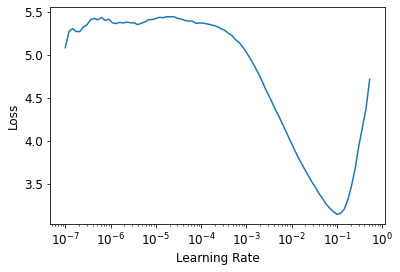

In [69]:
lr_min, lr_steep = learn.lr_find()

In [70]:
lr_min

0.010000000149011612

In [71]:
lr_steep

0.0020892962347716093

In [73]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(2, base_lr=3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.276517,0.309059,0.914073,00:32


epoch,train_loss,valid_loss,accuracy,time
0,0.529192,0.376760,0.880920,00:42
1,0.337608,0.229282,0.930311,00:42


In [75]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fit_one_cycle(3, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.178474,0.332183,0.899188,00:32
1,0.546581,0.241097,0.928281,00:33
2,0.329657,0.208503,0.937754,00:33


In [76]:
learn.unfreeze()

SuggestedLRs(lr_min=9.12010818865383e-08, lr_steep=1.3182567499825382e-06)

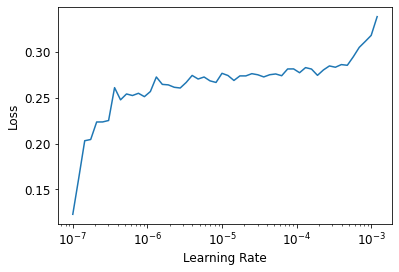

In [77]:
learn.lr_find()

In [78]:
learn.fit_one_cycle(6, lr_max=1e-5)

epoch,train_loss,valid_loss,accuracy,time
0,0.244611,0.202906,0.939784,00:42
1,0.247282,0.200282,0.936401,00:42
2,0.227088,0.189825,0.940460,00:42
3,0.209441,0.186329,0.939784,00:41
4,0.203364,0.182856,0.941813,00:41
5,0.177501,0.183450,0.941137,00:42


In [81]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fit_one_cycle(3, 3e-3)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,1.139970,0.356064,0.895129,00:33
1,0.533281,0.259702,0.919486,00:33
2,0.324040,0.225619,0.931664,00:33


epoch,train_loss,valid_loss,accuracy,time
0,0.257498,0.216949,0.930988,00:42
1,0.251304,0.208196,0.935047,00:42
2,0.236665,0.200767,0.937077,00:42
3,0.206639,0.197808,0.935724,00:42
4,0.188263,0.197131,0.936401,00:42
5,0.159690,0.192207,0.935724,00:42
6,0.150211,0.182169,0.939784,00:41
7,0.140627,0.183073,0.941813,00:41
8,0.129140,0.178747,0.941813,00:41
9,0.129193,0.178977,0.939784,00:42


In [82]:
from fastai.callback.fp16 import *
learn = cnn_learner(dls, resnet34, metrics=accuracy).to_fp16()
learn.fine_tune(6, freeze_epochs=3)

epoch,train_loss,valid_loss,accuracy,time
0,2.559850,0.548380,0.843708,00:20
1,0.930767,0.288145,0.908660,00:19
2,0.554467,0.270288,0.916103,00:20


epoch,train_loss,valid_loss,accuracy,time
0,0.368122,0.236206,0.928281,00:22
1,0.359387,0.291924,0.913396,00:23
2,0.280644,0.298254,0.903248,00:21
3,0.194166,0.235211,0.927605,00:22
4,0.123787,0.204740,0.939784,00:23
5,0.084169,0.198486,0.941813,00:22
